### Map about accidents on pedestrian crossings in Helsinki area 2018

The data about the accidents is from Tilastokeskus "Tieliikenneonnettomuudet 2018" dataset. 
https://etsin.fairdata.fi/dataset/047c2358-64fe-43ff-82e2-65db8865806f 

And the Helsinki municipality borders is from NLS.
https://etsin.fairdata.fi/dataset/d4a1a8ba-7fc2-4f84-ba3d-6dbaeeacca89

In [29]:
# Import essential modules
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import folium

# Filepaths
hel_fp = r"data/Helsinki_kunta.shp"

# Reading files
hel = gpd.read_file(hel_fp)

In [30]:
# Checking CRS'
print(hel.crs)

epsg:3067


In [64]:
hel = hel.to_crs(epsg=3067)

In [65]:
print(hel.crs)

epsg:3067


In [66]:
onnet = pd.read_csv('hel_onnet.csv', usecols=[0,1,3,4,12,13])

In [67]:
from shapely.geometry import Point
# Create an empty column for the DataFrame where the values will be stored
col_name = 'geometry'
onnet[col_name] = None

# Iterate over the rows
for i, row in onnet.iterrows():
    coord = Point(row['x'], row['y'])
    
    # Updating geometry column
    onnet.loc[i, col_name] = coord

In [68]:
geometry = [Point(xy) for xy in zip(onnet.x, onnet.y)]
accid = onnet.drop(['x', 'y'], axis=1)
onnet_gpd = gpd.GeoDataFrame(accid, crs="EPSG:3067", geometry=geometry)

In [69]:
onnet_gpd.head()

,vvonn,kkonn,vakav,onntyyppi,geometry
0,2018,3,2,6,POINT (391839.580 6675817.580)
1,2018,3,3,6,POINT (393863.270 6681521.580)
2,2018,6,2,6,POINT (384051.630 6673969.640)
3,2018,8,2,6,POINT (387147.380 6674537.020)
4,2018,11,2,6,POINT (381048.420 6671297.970)


In [70]:
print(onnet_gpd.crs)

EPSG:3067


<AxesSubplot:>

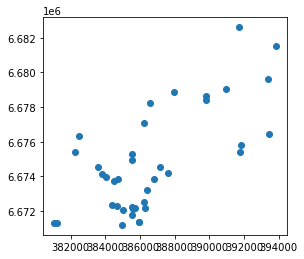

In [71]:
onnet_gpd.plot()

In [72]:
# Convert points to GeoJSON
accid_gjson = folium.features.GeoJson(onnet_gpd, name="Accidents on pedestrian crossings")

# Convert municipality border to GeoJSON
hel_gjson = folium.features.GeoJson(hel, name="Helsinki's borders")

Let's create the map

In [77]:
# Create a Map instance
m = folium.Map(location=[60.22, 25.0], tiles='OpenStreetMap', zoom_start=11, control_scale=True)

# Add accidents and borders to the map instance
accid_gjson.add_to(m)

hel_gjson.add_to(m)


# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)

m

In [78]:
# Get x and y coordinates for each point
onnet_gpd["x"] = onnet_gpd["geometry"].apply(lambda geom: geom.x)
onnet_gpd["y"] = onnet_gpd["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(onnet_gpd["y"], onnet_gpd["x"]))

In [75]:
locations

[(6675817.58, 391839.58),
 (6681521.58, 393863.27),
 (6673969.64, 384051.63),
 (6674537.02, 387147.38),
 (6671297.97, 381048.42),
 (6671315.84, 381227.24),
 (6676430.32, 393474.52),
 (6672135.11, 385616.4),
 (6674966.95, 385563.4),
 (6672325.12, 384696.53),
 (6679650.08, 393404.91),
 (6672326.58, 384385.51),
 (6676306.85, 382473.74),
 (6673739.83, 384519.27),
 (6671779.49, 385521.27),
 (6675393.56, 391767.72),
 (6678857.7, 387944.36),
 (6678622.87, 389811.87),
 (6674122.82, 383792.47),
 (6672227.21, 385561.59),
 (6677084.75, 386243.23),
 (6674550.09, 383563.21),
 (6671391.34, 385961.99),
 (6678250.23, 386608.26),
 (6672195.01, 386301.38),
 (6682607.62, 391698.85),
 (6678399.39, 389833.97),
 (6671206.29, 384979.4),
 (6673874.78, 386822.68),
 (6672178.11, 385724.03),
 (6672088.83, 385005.79),
 (6674181.77, 387623.37),
 (6675421.47, 382260.59),
 (6671380.79, 385968.66),
 (6679018.99, 390957.8),
 (6673863.81, 384757.32),
 (6675278.04, 385527.68),
 (6672528.65, 386240.62),
 (6673219.44, 386

In [76]:
from folium.plugins import MarkerCluster

# Creating a map instance
m = folium.Map(location=[60.22, 25.0], tiles='stamentoner', zoom_start=11, control_scale=True)

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(m)


# Show heatmap
m

In [7]:
# Saving the map as HTML file
outfp = r"docs/accidents_map.html"
m.save(outfp)